# Best Strategy for Non-Hammer Team at 1 End

## Research Question:
- “In the first end, which opening shot strategy gives the non-hammer team a higher probability of either forcing the opponent to a single point (Force) or successfully stealing (Steal)?"

- The final goal is to compare these patterns by country (NOC) and determine which strategy—aggressive or conservative—is most effective for each nation.

In [1]:
# Import required libraries for data analysis and visualization
import pandas as pd             # For data manipulation and analysis
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For plotting and visualization
import seaborn as sns           # For advanced statistical data visualization

# Enable inline plotting (so plots appear directly in Jupyter Notebook)
%matplotlib inline

# Suppress warning messages for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Display all columns in pandas DataFrames without truncation
pd.set_option('display.max_columns', None)

In [2]:
# Load all required datasets from the "Data" folder

competitions = pd.read_csv("Data/Competition.csv")   # Contains information about each competition (e.g., year, event type)
competitors = pd.read_csv("Data/Competitors.csv")    # Contains player-level details such as names and team affiliations
ends = pd.read_csv("Data/Ends.csv")                  # Records end-level results, including scores and power play usage
games = pd.read_csv("Data/Games.csv")                # Provides match-level information such as teams, scores, and hammer status
stones = pd.read_csv("Data/Stones.csv")              # Shot-by-shot dataset with detailed stone positions and shot types
teams = pd.read_csv("Data/Teams.csv")                # Contains team-level information including NOC (country) and team IDs

### Step 1: Data Merging and Basic Filtering


1.1 Primary Keys


Game-level identifier: (CompetitionID, SessionID, GameID)


Team-level identifier: TeamID


End-level identifier: EndID

In [4]:
# Merge Ends, Games, and Teams datasets  
# → Combine end-level records with corresponding game and team information
df = (
    ends
    .merge(games, on=["CompetitionID", "SessionID", "GameID"], suffixes=('', '_game'))  # Add game details (e.g., scores, hammer info)
    .merge(teams, on=["CompetitionID", "TeamID"], suffixes=('', '_team'))               # Add team details (e.g., NOC, country name)
)

In [5]:
df.head(16)

,CompetitionID,SessionID,GameID,TeamID,EndID,Result,PowerPlay,GroupID,Sheet,NOC1,NOC2,ResultStr1,ResultStr2,LSFE,Winner,TeamID1,TeamID2,NOC,Name
0,0,1,1,19,1,0,NaN,0,A,SWE,GBR,5,9,0,0,19,27,SWE,Sweden
1,0,1,1,27,1,1,NaN,0,A,SWE,GBR,5,9,0,0,19,27,GBR,Great Britain
2,0,1,1,19,2,2,NaN,0,A,SWE,GBR,5,9,0,0,19,27,SWE,Sweden
3,0,1,1,27,2,0,NaN,0,A,SWE,GBR,5,9,0,0,19,27,GBR,Great Britain
4,0,1,1,19,3,0,NaN,0,A,SWE,GBR,5,9,0,0,19,27,SWE,Sweden
5,0,1,1,27,3,3,NaN,0,A,SWE,GBR,5,9,0,0,19,27,GBR,Great Britain
6,0,1,1,19,4,1,NaN,0,A,SWE,GBR,5,9,0,0,19,27,SWE,Sweden
7,0,1,1,27,4,0,NaN,0,A,SWE,GBR,5,9,0,0,19,27,GBR,Great Britain
8,0,1,1,19,5,2,NaN,0,A,SWE,GBR,5,9,0,0,19,27,SWE,Sweden
9,0,1,1,27,5,0,NaN,0,A,SWE,GBR,5,9,0,0,19,27,GBR,Great Britain


### Step 2: Identifying Non-Hammer Teams in the First End


The LSFE column in Games.csv indicates which team started with the hammer.


LSFE = 1 → NOC1 had the hammer


LSFE = 0 → NOC2 had the hammer

In [6]:
# Identify teams without the hammer

df['IsFirstEnd'] = (df['EndID'] == 1).astype(int)  # Flag the first end
df['HammerTeamID'] = df.apply(                     # Determine which team has the hammer
    lambda x: x['TeamID1'] if x['LSFE'] == 1 else x['TeamID2'], axis=1
)
df['HasHammer'] = (df['TeamID'] == df['HammerTeamID']).astype(int)  # Mark teams with hammer = 1, without = 0

# Filter only the first end and teams without the hammer
first_end_nonhammer = df[(df['EndID'] == 1) & (df['HasHammer'] == 0)]

In [7]:
df.head(16)

,CompetitionID,SessionID,GameID,TeamID,EndID,Result,PowerPlay,GroupID,Sheet,NOC1,NOC2,ResultStr1,ResultStr2,LSFE,Winner,TeamID1,TeamID2,NOC,Name,IsFirstEnd,HammerTeamID,HasHammer
0,0,1,1,19,1,0,NaN,0,A,SWE,GBR,5,9,0,0,19,27,SWE,Sweden,1,27,0
1,0,1,1,27,1,1,NaN,0,A,SWE,GBR,5,9,0,0,19,27,GBR,Great Britain,1,27,1
2,0,1,1,19,2,2,NaN,0,A,SWE,GBR,5,9,0,0,19,27,SWE,Sweden,0,27,0
3,0,1,1,27,2,0,NaN,0,A,SWE,GBR,5,9,0,0,19,27,GBR,Great Britain,0,27,1
4,0,1,1,19,3,0,NaN,0,A,SWE,GBR,5,9,0,0,19,27,SWE,Sweden,0,27,0
5,0,1,1,27,3,3,NaN,0,A,SWE,GBR,5,9,0,0,19,27,GBR,Great Britain,0,27,1
6,0,1,1,19,4,1,NaN,0,A,SWE,GBR,5,9,0,0,19,27,SWE,Sweden,0,27,0
7,0,1,1,27,4,0,NaN,0,A,SWE,GBR,5,9,0,0,19,27,GBR,Great Britain,0,27,1
8,0,1,1,19,5,2,NaN,0,A,SWE,GBR,5,9,0,0,19,27,SWE,Sweden,0,27,0
9,0,1,1,27,5,0,NaN,0,A,SWE,GBR,5,9,0,0,19,27,GBR,Great Britain,0,27,1


In [8]:
first_end_nonhammer.head()

,CompetitionID,SessionID,GameID,TeamID,EndID,Result,PowerPlay,GroupID,Sheet,NOC1,NOC2,ResultStr1,ResultStr2,LSFE,Winner,TeamID1,TeamID2,NOC,Name,IsFirstEnd,HammerTeamID,HasHammer
0,0,1,1,19,1,0,NaN,0,A,SWE,GBR,5,9,0,0,19,27,SWE,Sweden,1,27,0
16,0,1,2,20,1,0,NaN,0,B,AUS,USA,5,6,1,0,46,20,USA,United States of America,1,46,0
32,0,1,3,17,1,1,NaN,0,C,NOR,CZE,6,7,0,0,17,22,NOR,Norway,1,22,0
50,0,1,4,18,1,0,NaN,0,D,CHN,SUI,7,6,1,1,43,18,SUI,Switzerland,1,43,0
69,0,2,1,46,1,0,NaN,0,A,AUS,CHN,5,6,0,0,46,43,AUS,Australia,1,43,0


### Step 3: Extracting Opening Shots


Stones.csv contains the shot order (ShotID) and shot type (Task) for each end.


→ Use the first 2–3 shots of each team to define their initial strategy.

In [9]:
# Extract shots from the first end and only for non-hammer teams
shots = stones.merge(games, on=["CompetitionID", "SessionID", "GameID"])  # Combine shot data with game info
shots_first_end = shots[shots["EndID"] == 1]                              # Filter for the first end only

# Select the first 3 shots for each team to analyze opening strategy
shots_first3 = (
    shots_first_end.sort_values("ShotID")                                 # Sort shots in the order they were thrown
    .groupby(["CompetitionID", "SessionID", "GameID", "TeamID"])          # Group by game and team
    .head(3)                                                              # Take the first three shots per team
)

In [10]:
shots_first3.sort_values(["CompetitionID", "SessionID", "GameID", "ShotID"]).head(6)

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,TimeOut,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,GroupID,Sheet,NOC1,NOC2,ResultStr1,ResultStr2,LSFE,Winner,TeamID1,TeamID2
0,0,1,1,1,7,19,1,0,0,0,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27
1,0,1,1,1,8,27,1,0,1,2,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27
2,0,1,1,1,9,19,2,0,0,4,NaN,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27
3,0,1,1,1,16,27,2,0,0,0,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27
4,0,1,1,1,17,19,2,7,0,3,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27
5,0,1,1,1,18,27,2,6,1,0,NaN,963.0,1657.0,4095.0,4095.0,671.0,713.0,600.0,798.0,0.0,0.0,0.0,0.0,4095.0,0.0,4095.0,0.0,418.0,1608.0,590.0,1164.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27


In [11]:
shots_first3['ShotID'].unique()

array([ 7,  8,  9, 16, 17, 18])

### Step 4: Classifying Strategies Based on Shot Type (Task)


According to the meanings of each Task code:


Aggressive → “Guard”, “Draw”, “Freeze”


Conservative → “Take-out”, “Hit and Roll”, “Double Take-out”, “Clearing”

In [12]:
# Define a function to classify each shot into a strategic category based on its Task code
def classify_strategy(task):
    if task in [1, 2, 5, 0]:          # Codes corresponding to Guard, Draw, Front, Freeze → Aggressive plays
        return "Aggressive"
    elif task in [6, 7, 8, 9]:        # Codes for Take-out, Hit and Roll, Clearing, Double Take-out → Conservative plays
        return "Conservative"
    else:                             # All other types → Neutral or undefined strategies
        return "Neutral"

# Apply the strategy classification to each shot
shots_first3["StrategyType"] = shots_first3["Task"].apply(classify_strategy)

In [13]:
shots_first3.sort_values(["CompetitionID", "SessionID", "GameID", "ShotID"]).head(6)

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,TimeOut,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,GroupID,Sheet,NOC1,NOC2,ResultStr1,ResultStr2,LSFE,Winner,TeamID1,TeamID2,StrategyType
0,0,1,1,1,7,19,1,0,0,0,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27,Aggressive
1,0,1,1,1,8,27,1,0,1,2,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27,Aggressive
2,0,1,1,1,9,19,2,0,0,4,NaN,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27,Aggressive
3,0,1,1,1,16,27,2,0,0,0,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27,Aggressive
4,0,1,1,1,17,19,2,7,0,3,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27,Conservative
5,0,1,1,1,18,27,2,6,1,0,NaN,963.0,1657.0,4095.0,4095.0,671.0,713.0,600.0,798.0,0.0,0.0,0.0,0.0,4095.0,0.0,4095.0,0.0,418.0,1608.0,590.0,1164.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27,Conservative


In [14]:
shots_first3["StrategyType"].value_counts()

StrategyType
Aggressive      1556
Conservative     279
Neutral          229
Name: count, dtype: int64

In [15]:
# Identify which team has the hammer based on LSFE value
shots_first3["HammerTeamID"] = np.where(
    shots_first3["LSFE"] == 1, shots_first3["TeamID1"], shots_first3["TeamID2"]
)

# Create a flag indicating whether each team has the hammer (1 = has hammer, 0 = does not)
shots_first3["HasHammer"] = (shots_first3["TeamID"] == shots_first3["HammerTeamID"]).astype(int)

# Filter only the shots from non-hammer teams
nonhammer_stones = shots_first3.query("HasHammer == 0").copy()

In [16]:
nonhammer_stones["StrategyType"].value_counts()

StrategyType
Aggressive      909
Neutral          62
Conservative     61
Name: count, dtype: int64

Team-Level Strategy Determination:

In [17]:
# Define a function to determine the team's overall strategy based on their first few shots
def decide_strategy(strategies):
    s = set(strategies)
    if "Conservative" in s:          # If the team used at least one conservative shot
        return "Conservative"
    elif "Aggressive" in s:          # If no conservative shots but at least one aggressive shot
        return "Aggressive"
    else:                            # Otherwise, classify as Neutral
        return "Neutral"

# Aggregate shot-level strategies to team-level by game
team_strategy = (
    nonhammer_stones.groupby(["CompetitionID", "SessionID", "GameID", "TeamID"])
    ["StrategyType"].agg(decide_strategy)   # Apply strategy classification per team
    .reset_index()
)

In [18]:
team_strategy.head()

,CompetitionID,SessionID,GameID,TeamID,StrategyType
0,0,1,1,19,Conservative
1,0,1,2,20,Aggressive
2,0,1,3,17,Aggressive
3,0,1,4,18,Aggressive
4,0,2,1,46,Conservative


In [19]:
team_strategy["StrategyType"].value_counts()

StrategyType
Aggressive      283
Conservative     61
Name: count, dtype: int64

### Step 5: Linking End Results (Force / Steal)


Using the Result column from Ends.csv, calculate the following for each team and end:


- Steal:

    When the non-hammer team scores points (i.e., Result > 0).


    → From the hammer team’s perspective, this represents a complete defensive failure.


- Force:

  
    When the hammer team scores exactly one point (Result = 1).


    → Although the hammer team scores, they lose their hammer advantage — a successful defensive outcome for the non-hammer team.


First, extract the hammer team’s score and non-hammer team’s score for each game and end.

In [20]:
# Aggregate end results to calculate each team's score per end
end_result = ends.groupby(
    ["CompetitionID", "SessionID", "GameID", "EndID", "TeamID"]
)["Result"].sum().reset_index(name="EndScore")

# Filter only the first end for analysis
end_result_1 = end_result[end_result["EndID"] == 1]

In [21]:
end_result_1.head()

,CompetitionID,SessionID,GameID,EndID,TeamID,EndScore
0,0,1,1,1,19,0
1,0,1,1,1,27,1
16,0,1,2,1,20,0
17,0,1,2,1,46,1
32,0,1,3,1,17,1


Adding Steal / Force Labels:

In [22]:
# 1) Filter only the first end (assuming the DataFrame already includes the HasHammer flag)
df_1 = df[df['IsFirstEnd'] == 1].copy()

# 2) Calculate Force and Steal indicators at the end level
def end_flags(g):
    hammer_score = g.loc[g['HasHammer'] == 1, 'Result'].sum()       # Total score of the hammer team
    nonhammer_score = g.loc[g['HasHammer'] == 0, 'Result'].sum()    # Total score of the non-hammer team
    return pd.Series({
        "StealFlag": int((nonhammer_score > 0) and (hammer_score == 0)),  # Non-hammer scores → Steal
        "ForceFlag": int((hammer_score == 1) and (nonhammer_score == 0)), # Hammer scores exactly 1 → Force
        "HammerScore": hammer_score,
        "NonHammerScore": nonhammer_score
    })

# Group by each game end and apply the function
outcomes = (
    df_1.groupby(["CompetitionID", "SessionID", "GameID", "EndID"])
        .apply(end_flags)
        .reset_index()
)

In [23]:
outcomes.head()

,CompetitionID,SessionID,GameID,EndID,StealFlag,ForceFlag,HammerScore,NonHammerScore
0,0,1,1,1,0,1,1,0
1,0,1,2,1,0,1,1,0
2,0,1,3,1,1,0,0,1
3,0,1,4,1,0,1,1,0
4,0,2,1,1,0,1,1,0


In [24]:
outcomes["EndID"].unique()

array([1])

### Step 6: Comparing Performance by Strategy


Merge each non-hammer team’s representative strategy (StrategyType) with the game outcomes (StealFlag, ForceFlag) to evaluate performance by strategy type.

In [25]:
# 1) Identify the hammer team for the first end
#    (Based on LSFE, TeamID1, and TeamID2 from the Games dataset)
#    *If the HammerTeamID column already exists, this step can be skipped.
eval_df = (
    team_strategy
      .merge(outcomes, on=["CompetitionID", "SessionID", "GameID"], how="left")  # Merge strategy data with end outcomes
      .merge(games[["CompetitionID", "SessionID", "GameID", "LSFE", "TeamID1", "TeamID2"]],
             on=["CompetitionID", "SessionID", "GameID"], how="left")            # Add game-level hammer info
)

# 2) Derive the hammer team ID for the first end
#    (LSFE = 1 → TeamID1 has hammer, LSFE = 0 → TeamID2 has hammer)
eval_df["HammerTeamID"] = eval_df.apply(
    lambda r: r["TeamID1"] if r["LSFE"] == 1 else r["TeamID2"], axis=1
)

# 3) Determine whether each team has the hammer (1 = has hammer, 0 = does not)
eval_df["HasHammer"] = (eval_df["TeamID"] == eval_df["HammerTeamID"]).astype(int)

# 4) Map each team to its country (NOC) based on CompetitionID and TeamID to avoid duplication
teams_map = teams[["CompetitionID", "TeamID", "NOC"]].drop_duplicates()
eval_df = eval_df.merge(teams_map, on=["CompetitionID", "TeamID"], how="left")

# 5) Ensure unique records by game, end, and team
eval_df = eval_df.drop_duplicates(
    ["CompetitionID", "SessionID", "GameID", "EndID", "TeamID"]
)

# 🔴 Core step: Keep only non-hammer teams for performance analysis
nonhammer = eval_df.query("HasHammer == 0").copy()

# Calculate the average Steal and Force success rates by strategy type
summary = (
    nonhammer.groupby("StrategyType")[["StealFlag", "ForceFlag"]]
             .mean()
             .reset_index()
)

print(summary)

   StrategyType  StealFlag  ForceFlag
0    Aggressive   0.314488   0.353357
1  Conservative   0.295082   0.278689


In [26]:
summary = (
    nonhammer.groupby("StrategyType")
        .agg(StealRate=("StealFlag","mean"),
             ForceRate=("ForceFlag","mean"),
             n=("StrategyType","size"))
        .reset_index()
)
print(summary)

   StrategyType  StealRate  ForceRate    n
0    Aggressive   0.314488   0.353357  283
1  Conservative   0.295082   0.278689   61


Aggressive: This strategy puts pressure on the opponent’s hammer team, increasing the likelihood of a successful steal.

Conservative: This strategy minimizes risk and focuses on stable end management rather than forcing the opponent to a single point (Force).

In [27]:
# Calculate average Steal and Force success rates by country (NOC) and strategy type
country_summary = (
    eval_df.groupby(["NOC", "StrategyType"])
    .agg({"StealFlag": "mean", "ForceFlag": "mean"})  # Compute mean success rates
    .reset_index()                                    # Reset index for a clean DataFrame
)

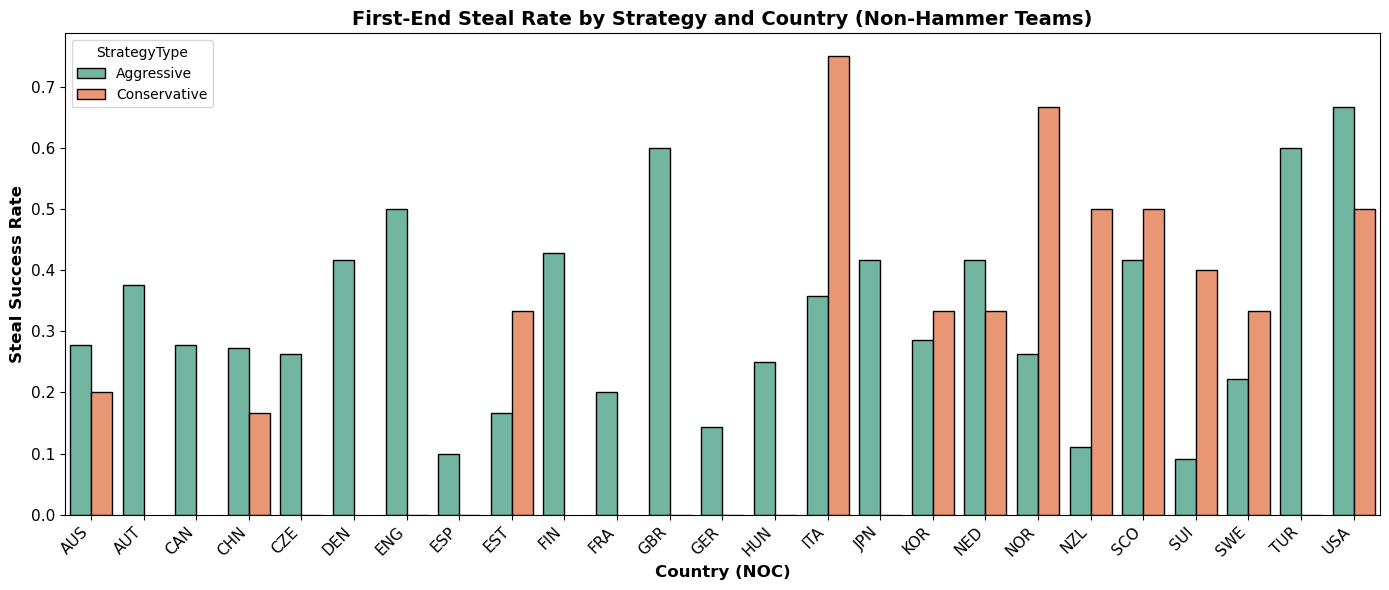

In [28]:
# Create a bar chart to visualize steal success rates by country and strategy type
plt.figure(figsize=(14, 6))

sns.barplot(
    x="NOC", y="StealFlag", hue="StrategyType",
    data=country_summary, palette="Set2", edgecolor="black"  # Different colors for each strategy
)

# Customize axis labels, title, and appearance
plt.xticks(rotation=45, ha="right", fontsize=11)              # Rotate country labels for readability
plt.yticks(fontsize=11)
plt.xlabel("Country (NOC)", fontsize=12, fontweight="bold")   # X-axis label
plt.ylabel("Steal Success Rate", fontsize=12, fontweight="bold")  # Y-axis label
plt.title("First-End Steal Rate by Strategy and Country (Non-Hammer Teams)", fontsize=14, fontweight="bold")

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("first_end_strategy.png")  # Save the figure as an image
plt.show()                             # Display the plot

Across most nations, aggressive openings tend to yield slightly higher steal rates.
However, countries such as Japan (JPN) and Norway (NOR) exhibit exceptional success in conservative setups, suggesting a stronger proficiency in controlled, defensive first-end play.

### Objective


To determine which strategy is more advantageous for each country (NOC) when playing the first end without the hammer — that is, whether teams achieve a higher steal success rate when choosing an Aggressive or Conservative strategy.


The analysis calculates the difference in steal success rates between the two strategies for each country to provide country-specific strategic recommendations.

In [29]:
# Compare the steal success rates between Aggressive and Conservative strategies for each country

country_diff = (
    country_summary
    .pivot(index="NOC", columns="StrategyType", values="StealFlag")  # Reshape data: rows = countries, columns = strategy types
    .fillna(0)                                                       # Replace missing values with 0
    .assign(Diff=lambda df: df["Aggressive"] - df["Conservative"])   # Calculate difference (Aggressive - Conservative)
    .reset_index()                                                   # Reset index for a clean DataFrame
)

In [30]:
country_diff

StrategyType,NOC,Aggressive,Conservative,Diff
0,AUS,0.277778,0.200000,0.077778
1,AUT,0.375000,0.000000,0.375000
2,CAN,0.277778,0.000000,0.277778
3,CHN,0.272727,0.166667,0.106061
4,CZE,0.263158,0.000000,0.263158
5,DEN,0.416667,0.000000,0.416667
6,ENG,0.500000,0.000000,0.500000
7,ESP,0.100000,0.000000,0.100000
8,EST,0.166667,0.333333,-0.166667
9,FIN,0.428571,0.000000,0.428571


Diff > +0.05: Aggressive strategy is more favorable for stealing (Recommended: “Aggressive” – offensive opening)

Diff < -0.05: Conservative strategy is more effective for stealing (Recommended: “Conservative” – defensive control)

-0.05 ≤ Diff ≤ 0.05: Minimal difference between strategies (Recommended: “Balanced” – adapt strategy based on game situation)

In [31]:
# Define a function to recommend the optimal strategy based on the difference in steal success rate
def recommend_strategy(diff):
    if diff > 0.05:                       # If aggressive strategy performs at least 5% better
        return "Aggressive (attack early)"
    elif diff < -0.05:                    # If conservative strategy performs at least 5% better
        return "Conservative (control and defend)"
    else:                                 # If the difference is small (within ±5%)
        return "Balanced (adjust based on opponent)"

# Apply the recommendation function to each country
country_diff["RecommendedStrategy"] = country_diff["Diff"].apply(recommend_strategy)

In [32]:
country_diff

StrategyType,NOC,Aggressive,Conservative,Diff,RecommendedStrategy
0,AUS,0.277778,0.200000,0.077778,Aggressive (attack early)
1,AUT,0.375000,0.000000,0.375000,Aggressive (attack early)
2,CAN,0.277778,0.000000,0.277778,Aggressive (attack early)
3,CHN,0.272727,0.166667,0.106061,Aggressive (attack early)
4,CZE,0.263158,0.000000,0.263158,Aggressive (attack early)
5,DEN,0.416667,0.000000,0.416667,Aggressive (attack early)
6,ENG,0.500000,0.000000,0.500000,Aggressive (attack early)
7,ESP,0.100000,0.000000,0.100000,Aggressive (attack early)
8,EST,0.166667,0.333333,-0.166667,Conservative (control and defend)
9,FIN,0.428571,0.000000,0.428571,Aggressive (attack early)


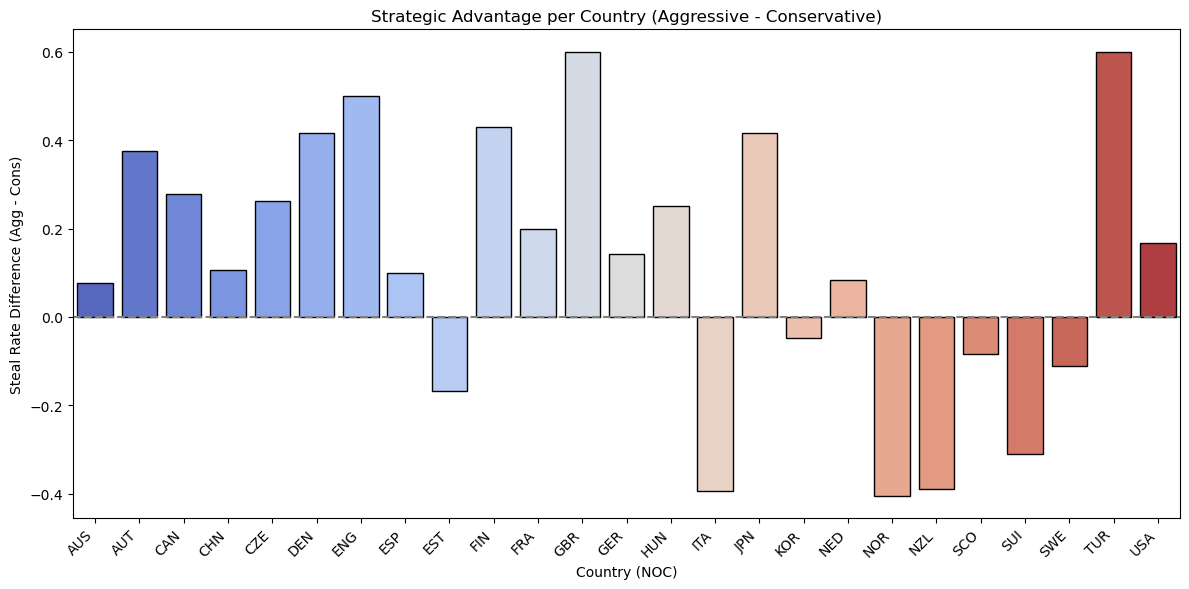

In [33]:
# Visualize the strategic advantage (Aggressive - Conservative) for each country
plt.figure(figsize=(12, 6))

sns.barplot(
    x="NOC", y="Diff", data=country_diff,
    palette="coolwarm", edgecolor="black"      # Use color gradient to indicate advantage direction
)

# Add a horizontal reference line at 0 (no difference between strategies)
plt.axhline(0, color="gray", linestyle="--")

# Customize labels, title, and layout
plt.xticks(rotation=45, ha="right")            # Rotate country labels for readability
plt.title("Strategic Advantage per Country (Aggressive - Conservative)")  # Chart title
plt.ylabel("Steal Rate Difference (Agg - Cons)")                          # Y-axis label
plt.xlabel("Country (NOC)")                                               # X-axis label

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("strategic advantage.png")  # Save the figure as an image file
plt.show()                              # Display the plot